<a href="https://colab.research.google.com/github/jrguy/tsp_cs5100/blob/main/FirstAttempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reason for approach as detailed below is due to the curse of dimensionality that occurs with the Traveling Salesman Problem. When the Traveling Salesman Problem is considered as a state space of a larger set, namely the goal of finding exactly n connections for the traveling salesman, it becomes clear as the goal of finding exactly n edges from the set of edges is larger and will grow faster than the goal of finding a path that is a subset of the larger set. For a well connected unique graph, this is necessarily the Binomial Coefficient of N(N-1)/2 Choose N. However, the number of paths that are possible for a given set of nodes is necessarily N!, as that is the permutation of the order of the nodes that preserves the completeness of the set, more readily seen as N(N-1)! for the idea of having boundary edges. 

This necessitates that the total number of combinations is based on a much larger set, namely the total number of ways for N nodes to as a set choose N edges, with multiple instances of nodes appearing, but each node choosing at least one edge. This comes out to a total of N(N-1)! / Binomial Coefficient (N(N-1)/2, N) 

When this value is considered for very large N, it can be seen that it drops off to zero at a highly fast rate. This means that the odds of selecting the paths from within the possible combinations of the nodes choosing at least one edge is vanishingly small. 

Further more, selecting the procedure in such a way as to make the top term as small as possible will limit the number of possible considerations, and as such, aid in finding the best outcomes only in so far as they do not greatly limit the possible chance of their discovery. 

For this reason, we consider the following implementation progression. 
First, for a random distribution of nodes, find the most efficient method of selecting an annealing style value of temperature given a number of iterations and nodes, and determining the best outcomes from the set of their values. This is done below, and is based off of a Standford University Mini-Project on the topic, which more can be found on in the link comment in the code. 

Following along to the above, what  we propose to investigate in a serious manner now is the selection of the outer node of the set and the modulation of the inner series. To do this :    
For each node, find the value of the opportunity cost for not selecting the least cost at that node (i.e., If I do not choose my two best links, what cost will I necessarily suffer?)
Order the nodes by the opportunity costs in this manner, and as you do, note for each the indices of concern, the costs, and the status as either least cost or second least cost, or third least cost or fourth least cost. 
Then, from the set of nodes, search for instances where the indices of a least cost for a given node are matched by the transpose of the indices for the least cost of another node. Pay particular attention for instances where a node has a least cost edge or second least cost edge to a node and its transpose has similar or better matching. These instances are to be highly preferred, and will form a secondary set for consideration and investigation. Similarly during this phase, calculate the minim heuristic for the set, where we will determine the valuation of the total edge distances if each node had selected it's least cost edges, not counting those that are highly preferred more than once (no double counting). This is the minimum cost for the set to have each node select at most two edges, and may not form a path. If it does form a path, we have necessarily found the minimum path by the way! Otherwise, from this organization, remove those links that are contested, potentially breaking chains and you will find only those that are highly preferred! This shows that the highly preferred are indeed a promising place to start for the secondary analysis. 

What we will do then is the following :    
0) Perform monte carlo on the entire set to ascertain the minimum path.

1) Given a set of nodes ordered by opportunity cost, set these nodes as the outer nodes of the set with their matching edges interior. These are not to be disturbed. Then, perturb the inner set, performing monte carlo style process with connections to attempt to discover the best connection. 

2) Given a set of highly preferred connections, perturb only those connections that are not part of these sets in the following manner 

  2a) First, with at least 2 sets if two such sets exist

  2b) If more than 2 such sets exist, alter their orientation within the sets
  until all combinatios of sets of 2 have been exhausted for analysis. 

  2c) Proceed to the next higher amount of sets. 

  2d) Check to see if any such sets can be combined into larger sets. If larger 
  chained connections are possible, for each such larger chain set, set them 
  and then perturb the inner portion of these as well.

Likely Outcomes : Little to no improvement, as the original modification likely samples from these sets as well. However, may be able to speed up and reduce number of iterations to get a good enough value in the meantime.   

Additionally, if you look at the original work we did on the idea of node modality, it can be seen that with this preprocessing approach as noted above, the nature of the nodes in a sparse graph can also be determined ahead of processing. This then gives three main advantages to this pre-process of the TSP :    
1) Figure out potential cost based on the number of exceedingly preferred sets within the TSP. The greater the number the greater the cost of this approach, but the more likely a good outcome can be achieved. 
2) Figure out the potential starting point for best annealing approaches, leading to better outcomes for the set. 
3) Figure out if the TSP is solvable for the stated graph based on the nature of the nodes in the graph, in time n^2, which is necessarily less than the TSP approaches. This is also incidental in the pre-process, given an additional benefit to completing this before starting the process of monte carlo simulations. 

In terms of revised schedule :    
In the next week complete step 1 as stated above 
In the week following complete step 2b and integrate with data being pulled in. This is the goal of completion for checkpoint 2. 
The final project completion will entail finishing 2c and 2d, as well as potentially including a checker for the sparse TSP graphs. 

In [ ]:
# Given a listOfFourBest by the aforementioned approach, in time n^2, we now 
# determine the absolute lower bound for the set by the use of nodal connection

# The aboslute lower bound must be such that for each node, if it were to select
# it's absolute lower bound connections, and if it were to do so allowing for 
# overlaps, then it is absolutely of the least cost possible. If two nodes over
# lap in such a choice it is a promising thing, but if three such overlap in 
# the form of A-B-C then it is an exceedingly promising thing. 

# However, if the overlap forms a clique set, A-B-C-A, where A has both B and C 
# as it's closest and C has both B and A as it's closest, then we have a 
# less-than-promising triangle. This means that either A or C will need to 
# settle for an increased cost to the network in the final solution, 
# and as such, the node of A or C with the least opportunity cost to select 
# otherwise should be chosen. This could then be propogated outward; 
# however as already described above, that would lead toward the even less 
# desirable binomial coefficient of the number of edges where we need to choose 
# n components. 

# For now, know that such sets should form less than exceedingly 
# promising alternate formations, with A-B-C and A and C both selecting their 
# alternates. These are less in potential value than those chains of 3 where 
# the ends do not agree, but more value than singular nodes agreeing on their 
# connections. Regardless, from this original formation, so long as double 
# counts are not allowed (A-B should be added, but B-A should not), 
# then we have arrived at an absolute lower bound for the TSP, 
# as this is the point at which all nodes have exactly two connections. 
# We have also thus set the bottom level heuristic whereby we can now 
# incremently improve the heuristic if needed through search for alternate 
# selections that void the cliques with some minimal opportunity cost.

# Now we can turn to the consideration of the advantages of 
# this pre-process additionally. 

# 1) Nodes that have two best options but are in 
# conflict with other nodes can be ranked at those conflict sites by the ones 
# that will suffer the least immediate opportunity cost (what will X pay in 
# in order to not have Y?), giving us a priority for investigating their 
# potential resolutions. 

# 2) Additionally, we have a way of analyzing if a graph that is sparse is 
# solvable from an initial consideration. For a sparse graph in this 
# implementation with undirected edges, any instance of a locked node meeting 
# with a multi-node where at least two other locked nodes meet necessitates 
# an impossibility for completing the graph. Any singular node connected to a 
# multi-node is likewise classically impossible. Further, combinations of 
# multi-nodes that are in linked formations of cliques greatly lowers likelihood
# and greatly increases costs. This can then be used to separate the impossible, 
# probable but costly, and probable and affordable. 

# 3) We have a heuristic approach that allows for the bounding of the best 
# with the added addition that in the case of perfect selections gives the 
# answer definitively in at best n^2 time, a massive improvement but one not
# often to be reached. It also delivers the heuristic original form in an 
# amount of time less than current best of n^3. This gives a way forward to 
# improve the heuristic of the approach incrementally. 

# 4) We also now have a look at some of the higher dimensionality of the 
# set of promising states. For a set of N nodes, if there are a set of M 
# exceedingly promising set ups, then for each of the set ups, we need to 
# consider the situation in which the Mth node is on the outside and none others
# are internal, the set up of M on the outside with one of them internal, etc, 
# for each such exceedingly promising candidate. This allows for selection of 
# the progression style as well at a pre-process stage. It may be essential that
# as many of the exceedingly promising connections be preserved, and if this is
# the case the limits the internal variation; conversely, it may be that only 
# 1 exceedingly promising candidate is desired, and so then the cycle of those 
# would need to be considered, but none of the internal sections. Based on the 
# idea that the preservation of all exceedingly promsing candidates can also 
# reveal the number of conflicts, what is proposed is that, after the 
# pre-process, a secondary pre-process checks, for how many exceedingly 
# promising candidates is the number of conflict sites and the number of 
# conflicts at each site minimized. This is similar to a coverage question, 
# showing that we have moved to NP-Complete. This is an improvement, but not 
# much of one. For the current work, we will consider only the potential cost 
# that would be inherent in running the simulation for rotations of the most
# promising candidates in order of the outside nodes with the least conflicts at
# terminating points. 

# 5) We can also now discuss the extension to this work, which is the longest
# chain consideration. If in the formation of exceedingly promising sets, it 
# can be shown that there exist longer chains than that of 3 nodes, such as a 
# 5 or 7, or longer chain, then the longest chain is that which has the most
# promise. If there is a tie in length, again split on end node contestation. 
# An important thing to avoid here is the formation of cliques however! The 
# longer a grouped set is, the greater the likelihood of forming a clique. This
# necessitates the use of consideration, where, if an additional end node is 
# merely promising (it has a connection that shares the sentiment of this being
# one of the best connections), it needs to be seen that that connection does
# not form a cycle within the current chain set. If it would, it may be set at
# that length on that side, as any additional selection will incur a necessary
# cost of opportunity. However, this needs to be done on both sides of the 
# chain sets. Once complete, a longest chain can be determined. This should then
# set the stage for the consideration, where the permutations now have two forms
# The outer chain, our best markov distance, should not be perturbed, but can be
# slid from one end to another. Consider A-B-C-D-E-F-G... as if it extended for
# some truly long connection. A can be seen to be progenitor in this case. The
# key thing though is the node in the middle. The middle node is necessarily the
# point from which it must connect to all others. Based on our progressionary 
# model, we will always have length segments of odd counts, giving a definite
# center point. From this, we now have the adjustment possible as below, if 
# we assume that node I is the center most point 
# - A - B - C - D - E - F - G - H - I - J - K - L - M - N - O - P - Q -
# Where Q and A are the termination points of the chain as currently considered. 
# We now can consider those situations in which we have 
# I -> Q at the front of the list and A -> H at the back of the list
# This then shortens the total amount of permutations needed for the set as 
# being of the form N-chainLength

Current Adjacency Matrix Below 
[0.         0.63636779 0.95267656 0.48693197 0.94284956 0.78751455
 0.41297084 0.52126369 0.53606532 0.48664191 0.61942467 0.36668916
 0.8100567  0.27225714 0.5008984  0.16605895]
[0.63636779 0.         0.60514473 0.22392665 0.2695907  0.69784448
 0.62252248 0.66457461 0.44436289 0.55974547 0.03436502 0.40279076
 0.17948437 0.40175321 0.60772469 0.50134441]
[0.95267656 0.60514473 0.         0.62330711 0.62499572 0.47441359
 0.19649663 0.27370085 0.54714272 0.36303453 0.16456014 0.30335926
 0.46753009 0.6353012  0.47538299 0.46413227]
[0.48693197 0.22392665 0.62330711 0.         0.40215174 0.68369993
 0.73516585 0.40823111 0.71151107 0.4045052  0.60891261 0.45952569
 0.52489252 0.51806245 0.73611358 0.46807069]
[0.94284956 0.2695907  0.62499572 0.40215174 0.         0.45169717
 0.9289113  0.73985245 0.11731992 0.54169504 0.50142858 0.54800929
 0.7932254  0.5911885  0.72198212 0.51706662]
[0.78751455 0.69784448 0.47441359 0.68369993 0.45169717 0.
 0.281569

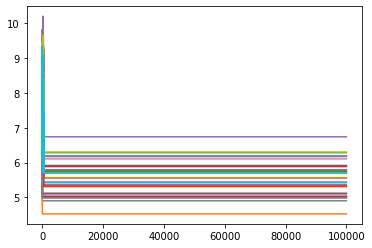

In [ ]:
# Based on description from Sanford Assignment Here
'''
  https://www.web.stanford.edu/class/cs168/p7.pdf

'''

import random
import math
import numpy as np
import matplotlib.pyplot as plt
import copy


N = 16 # the number of cities

# simulate an adjacency matrix of distances 
distance = np.random.rand(N, N)
distance = (distance + distance.T) / 2.0
ind_diag = range(N)
distance[ind_diag, ind_diag] = 0

# Calculate total distance for a given sequence
def cal_dist(distance, L):
    d = 0
    for i in range(len(L)):
        d = d + distance[L[i % N], L[(i + 1) % N]]
    return d

def findMinimFour(AdjacencyList): 
  '''
    findMinimFour returns a list of lists that for each for of the adj. list
    contains a list of the four minimum connections in order for a given row, 
    including the indices involved, then the cost, then the rank for the item. 
    This necessarily entails looping over the entire set twice in the brute
    force method. Better methodologies for determining the minimum four of the 
    unsorted set would be needed in such a way that the original values are not
    perturbed. At end returns the set of such combinations for the adj. list 
  '''
  listOfFourBestByRow = []
  for i in range(len(AdjacencyList)):
    currentRow = [] 
    leastMin = math.inf
    secondLeastMin = math.inf
    thirdLeastMin = math.inf
    fourthLeastMin = math.inf
    indexSetLeast = []
    indexSetSecondLeast = []
    indexSetThirdLeast = [] 
    indexSetFourthLeast = [] 
    for j in range(len(AdjacencyList[i])):
      if i == j:
        continue # No need to do the zero entries 
      else: 
        if AdjacencyList[i][j] < leastMin and len(indexSetLeast)==0:
          indexSetLeast = [i, j]
          leastMin = AdjacencyList[i][j]
        elif AdjacencyList[i][j] < leastMin and len(indexSetLeast) == 2: 
          if len(indexSetSecondLeast) == 0: 
            indexSetSecondLeast = [indexSetLeast[0], indexSetLeast[1]]
            secondLeastMin = leastMin
            leastMin = AdjacencyList[i][j]
            indexSetLeast = [i, j]
          elif len(indexSetSecondLeast) == 2: 
            if len(indexSetThirdLeast) == 0: 
              indexSetThirdLeast = [indexSetSecondLeast[0], indexSetSecondLeast[1]]
              thirdLeastMin = secondLeastMin
              indexSetSecondLeast = [indexSetLeast[0], indexSetLeast[1]]
              secondLeastMin = leastMin
              leastMin = AdjacencyList[i][j]
              indexSetLeast = [i, j]
            elif len(indexSetThirdLeast) == 2:  
                indexSetFourthLeast = [indexSetThirdLeast[0], indexSetThirdLeast[1]]
                fourthLeastMin = thirdLeastMin
                indexSetThirdLeast = [indexSetSecondLeast[0], indexSetSecondLeast[1]]
                thirdLeastMin = secondLeastMin
                indexSetSecondLeast = [indexSetLeast[0], indexSetLeast[1]]
                secondLeastMin = leastMin
                leastMin = AdjacencyList[i][j]
                indexSetLeast = [i, j]
        elif AdjacencyList[i][j] < secondLeastMin and len(indexSetSecondLeast) == 0:
            indexSetSecondLeast = [i, j]
            secondLeastMin = AdjacencyList[i][j]
        elif AdjacencyList[i][j] < secondLeastMin and len(indexSetSecondLeast) == 2:
          if len(indexSetThirdLeast) == 0: 
              indexSetThirdLeast = [indexSetSecondLeast[0], indexSetSecondLeast[1]]
              thirdLeastMin = secondLeastMin
              indexSetSecondLeast = [i, j]
              secondLeastMin = AdjacencyList[i][j]
          elif len(indexSetThirdLeast) == 2: 
              indexSetFourthLeast = [indexSetThirdLeast[0], indexSetThirdLeast[1]]
              fourthLeastMin = thirdLeastMin
              indexSetThirdLeast = [indexSetSecondLeast[0], indexSetSecondLeast[1]]
              thirdLeastMin = secondLeastMin
              indexSetSecondLeast = [i, j]
              secondLeastMin = AdjacencyList[i][j]
        elif AdjacencyList[i][j] < thirdLeastMin and len(indexSetThirdLeast) == 0: 
          indexSetThidLeast = [i, j]
          thirdLeastMin = AdjacencyList[i][j]
        elif AdjacencyList[i][j] < thirdLeastMin and len(indexSetThirdLeast) == 2: 
          indexSetFourthLeast = [indexSetThirdLeast[0], indexSetThirdLeast[1]]
          fourthLeastMin = thirdLeastMin
          thirdLeastMin = AdjacencyList[i][j]
          indexSetThirdLeast = [i, j]
        elif AdjacencyList[i][j] < fourthLeastMin :
          indexSetFourthLeast = [i, j]
          fourthLeastMin = AdjacencyList[i][j] 
        else:
          continue
        # End chained set 
      # End outer chain component loop goes to next j value here 
    # Exit J For Loop, no return here, but update larger set
    currentRowOpportunityCost = (fourthLeastMin + thirdLeastMin) - (secondLeastMin + leastMin)
    currentRow = [leastMin, indexSetLeast[0], indexSetLeast[1], 
                  secondLeastMin, indexSetSecondLeast[0], indexSetSecondLeast[1], 
                  thirdLeastMin, indexSetThirdLeast[0], indexSetThirdLeast[1], 
                  fourthLeastMin, indexSetFourthLeast[0], indexSetFourthLeast[1], "currentRow Opportunity Cost: ", currentRowOpportunityCost]
    listOfFourBestByRow.append(currentRow)
  # Exit I for Loop, return should be at this indent 
  return listOfFourBestByRow
# The exit point 

bestFourByRowOfAdjacencyMatrix = findMinimFour(distance)
print("Current Adjacency Matrix Below ")
for row in range(len(distance)):
  print(distance[row])
print("\n")
print("Best 4 neighbors in adjacency matrix below ")
for row in bestFourByRowOfAdjacencyMatrix:
  print(row)
print("\n")

def simulateSet(numberOfSimulations:int=10, TVal:int = -1):
  setOfBestDistances = []
  setOfBestPaths = []
  for j in range(numberOfSimulations):
    if TVal == -1:
      T = 1000
    else:
      T = TVal
    ITER = 100000
    L = np.arange(N)
    print("Original L  and distance: ", L)
    best = L
    bestDistance = cal_dist(distance, L)
    print (cal_dist(distance, L)) # initial distance
    dist_all = []
    for i in range(ITER):
        a = np.random.randint(1, N - 1) # Pick a random value in range for your set
        d_t = cal_dist(distance, L) # Get the distance you currently have 
        dist_all.append(d_t) # Put this in the list that will track distance over time
        L_tmp = copy.copy(L) # Make a copy 
        L_tmp[[a, (a + 1)%N]] = L_tmp[[(a + 1)%N, a]] # Set the L_temp at the position and position+1 modulo N to the value at position+1 module N and position (does the swap of the value positions)
        L_tmp_dist = cal_dist(distance, L_tmp) # Get the distance of the new temporary form (don't know if you'll keep it yet or not)
        delta_d = cal_dist(distance, L_tmp) - d_t # Get the distance of the new set up 
        if delta_d < 0 or ( T > 0 and random.random() < math.exp(-1*delta_d/T)): # Make a decision based on either improvement, or based on random selection
          L = L_tmp
        if d_t < bestDistance:
          best = L_tmp
          bestDistance = cal_dist(distance, L_tmp)
        if T > 3: 
          T -= 2
        else: 
            T = float(T) / (float(i)+(1.0*(TVal+1)))
    print("Final L and distance : ", L)
    finalDistance = cal_dist(distance, L)
    print (finalDistance) # final distance
    plt.plot(dist_all)
    setOfBestDistances.append(finalDistance)
    setOfBestPaths.append(L)
  minDist = min(setOfBestDistances)
  bestPath = setOfBestPaths[setOfBestDistances.index(minDist)]
  print("After ", numberOfSimulations, " the best path and distance found below")
  print(minDist)
  print(bestPath)

def simulateBiggerGroupsOfSets(numberOfSimulations:int = 10):
  # Couple rounds of tests later and there seems to be a discrepancy towards 
  # different temperatures. Varying temperature may be more effective in the long run. 
  # Seems to be somewhere above 10 and below 10000, which is a range to be sure. 
  # Also may be that different temperatures work better for different set ups as well. 
  # TList = [0, 1, 10, 100, 1000, 10000, 50000, 100000]
  TList = [10, 100, 1000]
  for k in range(len(TList)):
    print("Results for T = ", TList[k])
    simulateSet(10, TList[k])
    print("End Results for set \n\n")

simulateBiggerGroupsOfSets()

After considerations and consultation with both Dr. Alan Jamieson and Dr. Lindsay Jamieson, the update process has been modified to now ascertain the following for a promising chain. As such, the program will need to be refocused on the development of a ascertainment of promising lengths before reaching a negative valuation. Those chains that can complete the entirety without a negative valuation are to be desired as they move through the network, and are detailed below. 

Consider a singular node that wishes to make two connections, for now labeled as A, B, and C. A wishes to connect to B and C. This implies that for this connection to be a valid and useful connection that the chain of B-A-C must have a positive valuation as detailed below 

Weight of A connection to best two nodes not B or C - weight of A connection to B and C. 

If this is negative, it means that there were better nodes than these to select, which implies a contradiction. 

Weight of B not A or C - weight of B-A and not C 

If this is negative it implies that B has a better connection to two other nodes that are not c or a than it does to have a connection to a and c. This can be negative, and would mean that the weight of B-A and not C is greater than B connected to two others. This would mean that B does not prefer A, and would be a key point to stop on the search for a promising chain. 

Weight of C not A or B - weight of C-A and not B

Similar to the above, this is to ascertain that C desires A as well in mutual reasons. 

In all of the above cases, we are looking for the minimal cost weight on each consideration. 

Now we confirm the weight is valid with the next two considerations. 

Weight of A-B-C - A-B-notC

If this is positive we know that the weight of A-B-C is greater than the weight of B-A-notC. This would mean that a clique is avoided and that is a good thing. If this is negative, that would mean we would form a clique, and again this is a good point to stop. 

Weight of A-C-B - A-C-notB

Again for the other side. This shows that we are not going to form a clique. 

If all of the above a true and pass, we have ascertained the length of size 3 preliminarily. For the purpose of this project, we are only going to consider preliminary considerations for validation. More formal validations will await a later point. 

If we have not desired to form a clique, and we have mutual desire to form a chain, and we have a chain that is valid for the network, then we are now ready to consider the extension of the chain in a preliminary fashion. 

For each extension, the above does not change very much. In this case, we are now considering the addition of nodes D and E to B and C respectively. 

Prior Weight

Weight of B notNetwork1 notNetwork2 - D-B-A (Similar to A eval at prior)

Weight of C notNetwork1 notNetwork2 - E-C-A (Similar to A eval at prior)

Weight of D notNetwork1 notNetwork2 - B-D-NotNetwork1 (mutual desires) 

Weight of E notNetwork1 notNetwork2 - C-E-NotNetwork1 (mutual desires) 

(min(Weight of B-D-networkNode)) - B-D-NotNetwork1 (non-clique) 

(min(Weight of C-E-networkNode)) - C-E-NotNetwork1 (non-clique) 

Note that as the expansion grows, the prior weight is absorbed. Note also that the validation of the non-clique and mutual desires must occur for any combination in the set. This then shows that this is a satisfying chain, but not a validated chain. To validate would require checking against the converse, which is considered in a later section. 

For now, note that the satisfying constraints above increase in cost of consideration as the size of the chain grows, but that the costs incurred only ever increase by a value of N. This makes this an approach that is valid much more quickly, especially, as it can be considered that all of the right hand side components can be pre-calculated. This is valuable especially for the last two considerations, which are of clique status. By doing this, as the minimum will be selected, a functionality to report on the minimum weight if greater than the non-clique constraint can be utilized, allowing again for early stopping on larger sets. 

From this, we can establish chains that are promising up to a certain length in a given amount of time. Now we can turn to the idea of validation. 

For a confirmation of a chain of length 3 it can be seen that the above needing to sum to a total positive value is a component of the proof of this. To further ascertain this, the next components are required as well. 

For all other nodes in the graph 

Do all nodes agree that to connect to one of the network components is more expensive than to not connect to one of the network components? 

Do all nodes agree that to connect to two of the network components is more expensive than to not connect to one of the network components? 

In case of disagreements, by how much do they disagree? 

V notNetwork1 notNetwork2 - V network notNetwork1 

If this is positive, this means that they disagree. Record amount of disagree. 

V notNetwork1 notNetwork2 - V network1 network2 

If this is positive, this means that they disagree. Record amount of disagree. 

If sum of disagreement is greater than promise of chain, this chain is voidable at this length. This means one size less than this is promising. If sum of disagreement is less than promise of chain, the chain is valid up to that point. 

This can then continue for the size of the combination, but can quickly seen to grow in scale. Some ways to avoid the pitfall is early stop due to size elimination. This would allow the promising chain at largest length to have this run at the minimal component, and then progress upwards from there. 

That said, this is a distressing finding as well, as it can be seen that the validation process necessarily expands in size at a binomial rate. Consider that for a chain of length 3, the valuation involves compuational steps at 3 choose 1 * n steps, 3 choose 2 * n steps. For a length of 5, that would mean 5 choose 1, 5 choose 2, 5 choose 3, 5 choose 4 all times n steps, where we are now assuming that the n steps is based on the much larger set size versus the chain length. 

Thus it can be seen that for a highly densly connected graph, as the size of the graph grows there is no way to either find the path through elimination or considerations that validate the graph. Even considering that as the length of the chain must always remain within half the size of the graph, there is no way to circumvent this impact on a complete graph. 

Either the probability of finding the path is too small 

(N! / (avg. density (avg. density - 1))^N)

Or the cost of validating chains within the graph grows too quickly 

O(Summation i=1 to M-1 {(N-M) * (M choose i) * shift amounts})

Where M is the length of the chain and N-M represents the positive value of the total number of nodes that is not in the chain currently, and shift amounts is the amount of places that the key value can be shifted to, as that location can vary, thus varying the chain cost. 

This does hint a way forward for sparser graphs though. This shows that for a sparse graph, it may be possible to arrive at a lower cost with higher probability through validation if instead of N only the subset n that are connected to a given component are considered. This can greatly limit the cost, and potentially open up avenues of further research. 

For now, this theory work yields the following findings: 

A clear simple way to determine path impossibility through the states of the nodes {nodes of degree greater than 2 connecting to 3 nodes or more of degree 2}

A clear probability showcasing that as average density increases, the probability decreases {N! / ((avg density (avg density -1))^N)} of succesfully finding a path through combinatorial methods. 

A clear cost validation that showcases increases in costs as chains grow in size versus the total size of the set 
{O(Summation i=1 to M-1 [(N-M)*(M choose i) * shift amounts])}

Attempted implementation of the promising chain process with implementation for a monte carlo markov method and analysis of theoretical comparison now follows. 


In [ ]:
# Given an adjacency matrix, row number -> return tuple of rows in chain if promising or False 
# For a given row, determine if there exists a promising chain by 
# First, get cost of chain B-A-C and find difference with NOTB,C - A - NOTB,C2
# Then, get cost of NOTA,C - B - NOTA,C and find difference with A-B-NOTA,C
# Do same with C : NOTA,B - C - NOTA,B and find difference with A-C-NOTA,B
# Record both of these, and sum with initial value. 
# Then get cost of A-B-C and find difference with A-B-NOTA,C. If negative, can discard -> implies clique forming 
# Do not sum with initial. 
# Do same for A-C-B and find difference with A-C-NOTA,B. If negative, can discard -> implies clique forming
# Do not sum with initial. 
# We do not sum non-clique forming as that is to be expected of promising chains.

def promising_sequence(adjacencyMatrix, rowNum):
  # Get minimum indices and values for the stated rowNumber
  # Get minimum indices and values for the paired rows not including each other
  # Do analysis
  # For now, assume undirected graph for adjacency matrix 
  minB = math.inf
  minC = math.inf
  indexB=[rowNum, -1]
  indexC=[rowNum, -1]
  # Loop through and get the minimum B and C for the set up, as well as their
  # matrice locations. Note that you will then use the second value as the
  # row value for these going forward. 
  for j in range(len(adjacencyMatrix[rowNum])):
    if j == rowNum:
      continue
    else:
      if minB > adjacencyMatrix[rowNum][j]:
        if minB == math.inf:
          minB = adjacencyMatrix[rowNum][j]
          indexB = [rowNum, j]
        else:
          minC = minB
          indexC = [rowNum, indexB[1]]
          minB = adjacencyMatrix[rowNum][j]
          indexB = [rowNum, j]
  # Now we can go and get the mins for B and for C that are not A, B and A, C 
  Bmin1=math.inf
  Bmin2=math.inf
  BIndexList1 = [indexB[1], -1]
  BIndexList2 = [indexB[1], -1]
  Cmin1=math.inf
  Cmin2=math.inf
  CIndexList1 = [indexC[1], -1]
  CIndexList2 = [indexC[1], -1]
  # Do B first 
  for j in range(len(adjacencyMatrix[indexB[1]])):
    if j == indexB[1] or j == rowNum or j == indexC[1]:
      continue # Don't match these ones
    else:
      if Bmin1 > adjacencyMatrix[indexB[1]][j]:
        if Bmin1 == math.inf:
          Bmin1 = adjacencyMatrix[indexB[1]][j]
          BIndexList1[indexB[1], j]
        else:
          Bmin2 = Bmin1
          BIndexList2 = [indexB[1], BIndexList1[1]]
          Bmin1 = adjacencyMatrix[indexB[1]][j]
          BIndexList1 = [indexB[1], j]

  # Similarly now for C 
  for j in range(len(adjacencyMatrix[indexC[1]])):
    if j == indexB[1] or j == rowNum or j == indexC[1]:
      continue # Don't match these ones
    else:
      if Cmin1 > adjacencyMatrix[indexC[1]][j]:
        if Cmin1 == math.inf:
          Cmin1 = adjacencyMatrix[indexC[1]][j]
          CIndexList1[indexC[1], j]
        else:
          Cmin2 = Cmin1
          CIndexList2 = [indexC[1], CIndexList1[1]]
          Cmin1 = adjacencyMatrix[indexC[1]][j]
          CIndexList1 = [indexC[1], j]

  # Once more for A but now without B and C. Condense this later.
  AaltMin1 = math.inf
  AaltMin2 = math.inf
  Aalt1Index = [rowNumber, -1]
  Aalt2Index = [rowNumber, -1]
  for j in range(len(adjacencyMatrix[rowNumber])):
    if j == rowNumber or j == indexB[1] or j == indexC[1]:
      continue # Don't match these ones 
    else:
      if AaltMin1 > adjacencyMatrix[rowNumber][j]:
        if AaltMin1 == math.inf:
          AaltMin1 = adjancencyMatrix[rowNumber][j]
          Aalt1Index[1] = j
        else:
          AaltMin2 = AaltMin1
          Aalt2Index[rowNumber, Aalt1Index[1]]
          AaltMin1 = adjacencyMatrix[rowNumber][j]
          Aalt1Index[rowNumber, j]

  # 1) Weight of A with not b or c 1 and not b or c 2 
  # 2) Weight of A with b and c 
  # 3) Weight of B with not A or C 
  # 4) Weight of C with not A or B 
  # 5) Weight of B with A and not C 
  # 6) Weight of C with A and not B 
  # 1 - 2 -> Cost of A not getting B or C (costTotal1)
  # 3 - 5 -> Cost of B not getting A (costTotal2)
  # 4 - 6 -> Cost of C not getting A (costTotal3)
  # 2 - 5 -> Cost of Clique  -> Ignored if negative or 0 (cliqueCheck1)
  # 2 - 6 -> Cost of Clique  -> Ignored if negative or 0 (cliqueCheck2)
  weightAwithoutBC = AaltMin1+AaltMin2
  weightAwithBC = minB + minC
  costTotal1 = weightAwithoutBC - weightAwithBC 
  weightOfBwithoutAC = Bmin1 + Bmin2 
  weightOfCwithoutAB = Cmin1 + Cmin2
  weightOfBwithAnotC = minB + Bmin1
  weightOfCwithAnotB = minC + Cmin1
  costTotal2 = weightOfBwithoutAC - weightOfBwithAnotC
  costTotal3 = weightOfCwithoutAB - weightOfCwithAnotB
  costTotal1 += costTotal2 + costTotal3 
  cliqueCheck1 = weightAwithBC - weightOfBwithAnotC
  cliqueCheck2 = weightAwithBC - weightOfCwithAnotB

  if cliqueCheck1 < 0 or cliqueCheck2 < 0 : 
    # Avoid cliques 
    return [False, rowNumber, indexB[1], indexC[1]]
  else: 
    if costTotal1 < 0: 
      # Avoid non promising chains 
      return [False, rowNumber, indexB[1], indexC[1]]
    else: 
      return [True, rowNumber, indexB[1], indexC[1]] # These form a promising chain



